<a href="https://colab.research.google.com/github/srivastavask/Pytorch-Tutorial/blob/main/Pytorch_tut1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip list

In [ ]:
2+2

4

In [1]:
import torch
import numpy as np

In [6]:
np1 = np.random.rand(3,4)
print(np1)
print(np1.dtype)

[[0.07496242 0.34667542 0.2044547  0.16806607]
 [0.89325342 0.38235252 0.46877853 0.92635504]
 [0.93105457 0.18573583 0.87051025 0.71034048]]
float64


In [9]:
tensor_2d = torch.randn(3,4)
print(tensor_2d)
print(tensor_2d.dtype)

tensor([[ 1.5213, -0.4708,  0.2208, -0.0954],
        [ 1.4028,  1.1479,  1.8350, -0.9660],
        [ 0.0335, -1.0204, -0.2636,  0.5637]])
torch.float32


In [11]:
tensor_3d = torch.zeros(2,3,4)
tensor_3d

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [12]:
my_tensor = torch.tensor(np1)
my_tensor

tensor([[0.0750, 0.3467, 0.2045, 0.1681],
        [0.8933, 0.3824, 0.4688, 0.9264],
        [0.9311, 0.1857, 0.8705, 0.7103]], dtype=torch.float64)

In [13]:
my_torch = torch.arange(10)
my_torch

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [17]:
my_shape = my_torch.reshape(2,5)
my_shape

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [22]:
my_torch1 = torch.arange(15)
my_shape1 = my_torch1.reshape(3,-1)
my_shape1

tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14]])

In [23]:
my_torch2 = torch.arange(10)
my_shape2 = my_torch2.reshape(-1,5)
my_shape2

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [27]:
my_torch3 = torch.arange(10)
my_shape3 = my_torch2.reshape(2,5)
my_shape3

tensor([[   0, 4141,    2,    3,    4],
        [   5,    6,    7,    8,    9]])

In [28]:
my_torch2[1] = 4141
my_shape3

tensor([[   0, 4141,    2,    3,    4],
        [   5,    6,    7,    8,    9]])

In [29]:
my_torch5 = torch.arange(10)
my_torch5

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [32]:
my_torch5[7]

tensor(7)

In [35]:
my_torch6 = my_torch5.reshape(5,2)

In [46]:
my_torch6[:,1]

tensor([1, 3, 5, 7, 9])

In [47]:
my_torch6[:,1:]

tensor([[1],
        [3],
        [5],
        [7],
        [9]])

In [48]:
tensor_a = torch.tensor([1,2,3,4])
tensor_b = torch.tensor([5,6,7,8])

In [49]:
tensor_a + tensor_b

tensor([ 6,  8, 10, 12])

In [51]:
torch.add(tensor_a, tensor_b)

tensor([ 6,  8, 10, 12])

In [52]:
tensor_a.add(tensor_b)

tensor([ 6,  8, 10, 12])

In [53]:
# tensor reassignment
tensor_a = tensor_a.add(tensor_b)
tensor_a

tensor([ 6,  8, 10, 12])

In [54]:
tensor_a = tensor_a.add_(tensor_b)
tensor_a

tensor([11, 14, 17, 20])

Creating a NN using torch

In [55]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [57]:
class Model(nn.Module):
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()  #instantiate nn model
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [58]:
# picking a random seed for randamization
torch.manual_seed(41)
model = Model()

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [62]:
# change last column
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)
my_df

<ipython-input-62-31d2ab34cca2>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica', 2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [63]:
# split tr-te
X = my_df.drop('species', axis=1)
y = my_df['species']

In [64]:
# numpy arrays
X = X.values
y = y.values

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [80]:
X_train = torch.FloatTensor(X_train)
X_train.shape
X_test = torch.FloatTensor(X_test)
X_test.shape

torch.Size([30, 4])

In [81]:
y_train = torch.LongTensor(y_train)
y_train.shape
y_test = torch.LongTensor(y_test)
y_test.shape

torch.Size([30])

In [75]:
criterian = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [76]:
from logging import logProcesses
epochs = 100
losses = []

for i in range(epochs):
  i += 1
  y_pred = model.forward(X_train)
  loss = criterian(y_pred, y_train)
  losses.append(loss.detach().numpy())
# print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} loss: {loss}')
  # do some backpropagraing take error rate of forward propagation and feed back
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 10 loss: 1.0227365493774414
Epoch: 20 loss: 0.8407701253890991
Epoch: 30 loss: 0.6065686345100403
Epoch: 40 loss: 0.4162401556968689
Epoch: 50 loss: 0.27880606055259705
Epoch: 60 loss: 0.18659552931785583
Epoch: 70 loss: 0.12621845304965973
Epoch: 80 loss: 0.08876660466194153
Epoch: 90 loss: 0.06682577729225159
Epoch: 100 loss: 0.0538492351770401


Text(0.5, 0, 'Epoch')

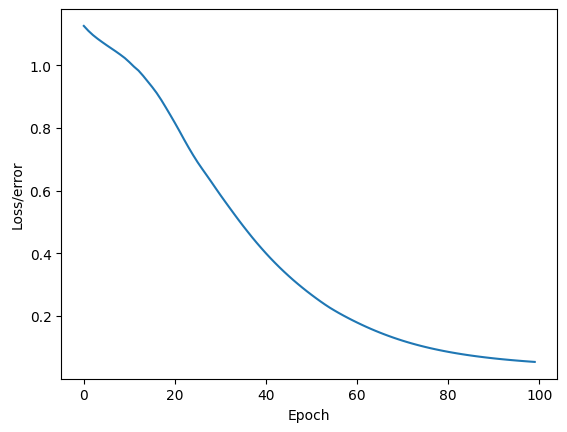

In [77]:
#graph
plt.plot(range(epochs), losses)
plt.ylabel('Loss/error')
plt.xlabel('Epoch')

In [82]:
# evaluate model
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterian(y_eval, y_test) # find loss

In [83]:
loss

tensor(0.1315)

In [89]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = 'Setosa'
    elif y_test[i] == 1:
      x = 'Versicolor'
    else:
      x = 'Virginica'


    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    #correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'we got {correct} correct!')


1.) tensor([-5.8760,  4.4628,  6.5124]) 	 2 	 2
2.) tensor([-7.5436,  4.1670,  9.7255]) 	 2 	 2
3.) tensor([-8.4504,  5.1271, 10.1987]) 	 2 	 2
4.) tensor([-4.3398,  5.6267,  2.5608]) 	 1 	 1
5.) tensor([-7.1825,  4.8754,  8.2992]) 	 2 	 2
6.) tensor([-3.3974,  5.3463,  1.2803]) 	 1 	 1
7.) tensor([-5.9231,  4.9822,  5.9997]) 	 2 	 2
8.) tensor([-4.2881,  5.7003,  2.3889]) 	 1 	 1
9.) tensor([-6.5356,  4.9257,  7.1260]) 	 2 	 2
10.) tensor([-8.0509,  4.4129, 10.3286]) 	 2 	 2
11.) tensor([-5.6762,  4.9500,  5.6215]) 	 2 	 2
12.) tensor([ 4.5662, -2.2476, -2.8911]) 	 0 	 0
13.) tensor([ 4.2571, -1.9967, -2.7330]) 	 0 	 0
14.) tensor([-2.1108,  4.0515,  0.5799]) 	 1 	 1
15.) tensor([ 3.4575, -1.2098, -2.3514]) 	 0 	 0
16.) tensor([-5.4724,  5.1165,  5.0934]) 	 2 	 1
17.) tensor([ 4.0557, -1.7949, -2.6492]) 	 0 	 0
18.) tensor([-5.8075,  4.6053,  6.2458]) 	 1 	 2
19.) tensor([ 4.4343, -2.1392, -2.8242]) 	 0 	 0
20.) tensor([ 3.4528, -1.2514, -2.3660]) 	 0 	 0
21.) tensor([-2.6189,  4.5619